<a href="https://colab.research.google.com/github/DSRajesh/research/blob/master/Captcha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


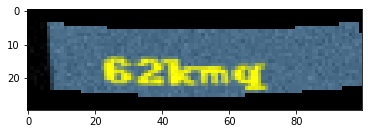

In [0]:
import numpy as np
import array
# below statement to be executed only once
#rng = np.random.RandomState(40)

# list of 36 characters to generate captcha
my_list = ['a','b','c','d','e', 'f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','0','1','2','3','4','5','6','7','8','9']
# produce a unique captcha by genearting random numbers in the range 0-36 using  "randint"  function 
list2 = [' ']
for i in range(5):
  list2.insert(i,my_list[rng.randint(36)])

#convert list to string
str1 = ''.join(list2)


# create a new image area of size (30,100) with some background color (73, 109, 137) and then insert the captcha at (10,10) position in the image area
from PIL import Image, ImageDraw
 
img = Image.new('RGB', (100, 30), color = (73, 109, 137))
 
d = ImageDraw.Draw(img)
d.text((10,10), str1, fill=(255,255,0))
 
img.save('pil_text.png')



# compute the random deformation transform (using skimage.transform.AffineTransform/skimage.transform.warp and PiecewiseAffineTransform functions below) 
#needed to deform/noise  the captcha image
from skimage.transform import PiecewiseAffineTransform
import skimage.transform

a=rng.randint(4)/10
den=1.4
den=den+a
tran=-5
b=rng.randint(10)
tran=tran+b
tform_augment = skimage.transform.AffineTransform(scale=(1. / den, 1. / den), rotation=np.deg2rad(+1),
                                                      shear=np.deg2rad(2), translation=(tran,3))  # den and tran are random numbers generated to decide 
                                                                                                # the random deformation needed during each captcha generation
imm=skimage.transform.warp(img,tform_augment)

# applying gaussian noise with random sigma value each time
row,col = imm.shape[:2]
mean = 0
# random sigma value
c=rng.randint(10)/10000 
var = 0.0005
var=var+c
sigma = var**0.5
#gaussian kernel for noising the image
gauss = rng.normal(mean,sigma,(row,col))
gauss = gauss.reshape(row,col,1)
imm = imm + gauss

# modulate the captcha image to a  sinusoidal shape of randomly picked frequency
rows, cols = imm.shape[0], imm.shape[1]
src_cols = np.linspace(0, cols, 20)
src_rows = np.linspace(0, rows, 10)
#creating the grid of the same shape as catcha image in 'src'
src_rows, src_cols = np.meshgrid(src_rows, src_cols)
src = np.dstack([src_cols.flat, src_rows.flat])[0]
fre=rng.randint(6)
#creating the modulated grid of the same shape as catcha image in 'dst'
dst_rows = src[:, 1] - np.sin(np.linspace(0, fre * np.pi, src.shape[0])) * 3
dst_cols = src[:, 0]
dst_rows *= 1.5
dst_rows -= 1.5 * 3

dst = np.vstack([dst_cols, dst_rows]).T


tform = PiecewiseAffineTransform()
#estimate a transform tform (from 'src' to 'dst') that can be used to  modulate the image to a  sinusoidal shape
tform.estimate(src, dst)
out_rows = imm.shape[0] 
out_cols = cols
#warp the deformed/noised image to sinusoidal shape
out = skimage.transform.warp(imm, tform, output_shape=(out_rows, out_cols))
import matplotlib.pyplot as plt
plt.imshow(out)

  